<a href="https://colab.research.google.com/github/priyanshiyadavnitsgr/Computer-Vision/blob/master/Contour_counting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Draw and count the number of objects in an image using contours.

#### Links to the Images used:


*   one_missing: https://drive.google.com/file/d/1PHf0-ZuoDsxwk9EWpRTXnqwRpb8e-pqM/view?usp=sharing
*   full: https://drive.google.com/file/d/13RmM2sk253WaxzhqvEBRjGG9QtyBXsUH/view?usp=sharing



In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [0]:
def cropped_object_detection(image, template, width=500, height=500):

    ## Detects the object using template matching.
    image_gray=gray(image.copy())
    
    result=cv2.matchTemplate(image_gray, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc= cv2.minMaxLoc(result)
    print(' Accuracy: ', max_val, '\n Location: ', max_loc)
    
    top_left=max_loc
    bottom_right=(top_left[0]+width, top_left[1]+height)
    detected=cv2.rectangle(image.copy(), top_left, bottom_right, (0,0,255), 4)

    #cv2_imshow( detected)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows() 
    
    cropped=image[ top_left[1]:top_left[1]+height, top_left[0]:top_left[0]+width]
    cv2_imshow(cropped)
    
    return cropped 


def gray(image):
  ## Converts the image into gray scale image
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



def contour_counting(image):

  ## Detects and draws the contours around the medicines.
  
  ## The image used is gray_scaled (for decreasing the complexity of images).
  ## We blur the image using Gaussian Blur so that we get the sharp edges.
  ## The kernel=(11,11) can be tuned as per required.
  ## Kernel takes only odd values.
  gaussian=cv2.GaussianBlur(image.copy(), (11,11), 0)
  
  ## We are setting a threshold for the image i.e. 15 and the style: cv2.THRESH_TOZERO. 
  ret,thresh1 = cv2.threshold(gaussian, 15, 255, cv2.THRESH_TOZERO)
  
  ## We are using Canny Edge Detection for detecting our contours.
  ## Initially both the threshold parameters are set very low i.e 10, so that we can get maximum number of contours.
  edged=cv2.Canny(thresh1, 10, 10)
  print('\n')
  cv2_imshow(edged)
  
  ## Contours are found using cv2.findContours().
  ## We can play around with the retreval modes and approximation methods.
  _, contours, hierarchy= cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  ## We get the number of all the contours using len(contours)
  print(len(contours))

  ## We are now drawing all the contours.
  image_=cv2.drawContours(image.copy(), contours,  -1, (0,0,255), 2)
  
  ## Since our aim here is to get a set of contours and not all the contours.
  ## So we are collecting only those contours who have a significant area.
  ## In this case, I have set the threshold area as 15.
  ## Threshold area can be tuned for gainig desired accuracy.
  cnt=[]
    # loop over the contours individually
  for c in contours:
         
        # if the contour is not sufficiently large (that is, it has to be graeter than 15 for this case), ignore it.
    if cv2.contourArea(c) > 15 :
      cnt.append(c)
      
  ## We are returning our new list of contours.    
  return cnt

  
  
  
def main_execution(image, template, width, height):
  
  ## image: the image on which you want to do the prediction.
  ## template: The refernce image, based on which the prediction will be done.
  ## Width: the widthh of the template image (can be tuned as per need).
  ## height: height of the template image (can be tuned as per need).
  
  
  ## We are generating grayScale images of both the image and template for further use using gray().
  image_gray=gray(image.copy())
  template_gray=gray(template)
  
  ## In crop_detection we are recieving the most accurate area for getting the desired area.
  ## The image recied isn't gray.
  image_not_gray=cropped_object_detection(image, template_gray, width, height)
  
  
  ## For contour counting we need to pass the grayScale version of the image we recieved from cropped_object_detection().
  ## GrayScale is preferred because it decreases the complexity.
  cnt=contour_counting(gray(image_not_gray))
  
  ## We will now be drawing the new contours( contours with area graeted than 15 in this case) over the image we recieved from cropped_boject_detection().
  image_contours=cv2.drawContours(image_not_gray.copy(), cnt,  -1, (0,0,255), 2)
  
  cv2_imshow(image_contours)
  
  ## Here we can get the number of contours, which is equal to the number of medicine(in this case).
  print('Number of medicines: ', len(cnt))
  
  
  
  
  
  
 

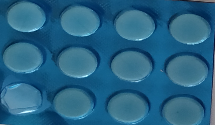

In [135]:
## Image of pack with one tablet missing.

missing=cv2.imread('/content/IMG_20191010_134449.jpg')
one_missing= cv2.resize(missing, (1000,1000))[675:800, 420:635 ]
cv2_imshow(one_missing)

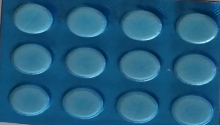

In [48]:
## Image of pack with all the images.

full=cv2.imread('/content/IMG_20191010_134338.jpg')
full= cv2.resize(full, (1000,1000))[655:780, 485:705 ]
cv2_imshow(full)

 Accuracy:  0.81730055809021 
 Location:  (412, 675)


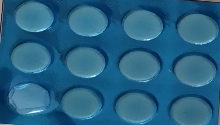

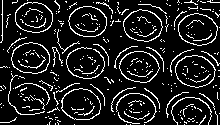

229


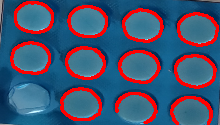

Number of medicines:  11


In [134]:
## We are using full (pack with all the medicines) as a reference and one_missing (pack with one medicine missing) as the target image.

missing=cv2.imread('/content/IMG_20191010_134449.jpg')
one_missing= cv2.resize(missing, (1000,1000))

main_execution(one_missing, full, 220, 125)



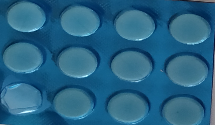

 Accuracy:  0.6802892684936523 
 Location:  (5, 0)


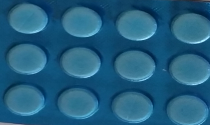

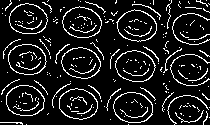

150


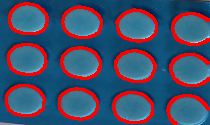

Number of medicines:  12


In [138]:
## We are using one_missing (pack with one medicine missing) as a reference and full(pack with all the medicine) as the target image.

missing=cv2.imread('/content/IMG_20191010_134449.jpg')
one_missing= cv2.resize(missing, (1000,1000))[675:800, 420:635 ]
cv2_imshow(one_missing)
main_execution(full, one_missing, 210,125)